#Importing required Libraries and Data

In [6]:
import numpy as np
import pandas as pd
import re
import emoji
import seaborn as sns

import spacy
nlp = spacy.load('en_core_web_sm')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
import matplotlib.pyplot as plt
import re
import nltk

In [7]:
data = pd.read_excel('/content/LabeledText.xlsx')
data

,File Name,Caption,LABEL
0,1.txt,How I feel today #legday #jelly #aching #gym,negative
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive
...,...,...,...
4864,995.txt,OMG. Well done #Eskom! 'Man dies during #LoadS...,positive
4865,996.txt,Feelin' the love in here! #ValentinesDay #caring,positive
4866,997.txt,#blue #eyes can't be #beaten,neutral
4867,998.txt,LA CHUCHA LOUUU TE CHUPO LOS OJOS..!,neutral


In [9]:
data.isnull().sum()

File Name    0
Caption      0
LABEL        0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4869 entries, 0 to 4868
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File Name  4869 non-null   object
 1   Caption    4869 non-null   object
 2   LABEL      4869 non-null   object
dtypes: object(3)
memory usage: 114.2+ KB


In [12]:
data.shape

(4869, 3)

In [13]:
data.describe()

,File Name,Caption,LABEL
count,4869,4869,4869
unique,4869,4663,3
top,1.txt,#February #Winter #Rainy #Stormy #Windy #Tuesd...,neutral
freq,1,10,1771


In [14]:
drop_neutral = data[ data['LABEL'] == 'neutral' ].index
data.drop(drop_neutral, inplace = True)

In [15]:
data.loc[data["LABEL"] == "negative", "LABEL"] = 0
data.loc[data["LABEL"] == "positive", "LABEL"] = 1

In [16]:
data['LABEL'].value_counts()

1    1646
0    1452
Name: LABEL, dtype: int64

In [17]:
data = data.astype({"LABEL": int})

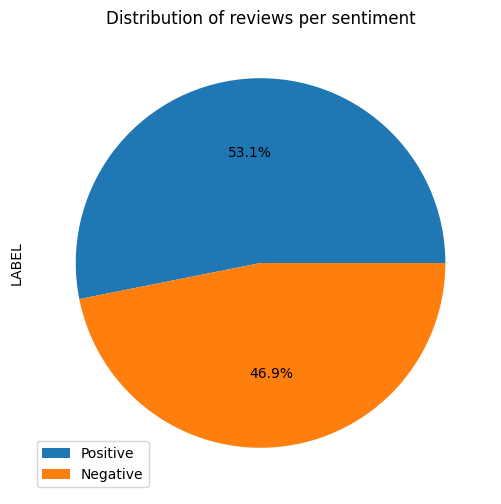

In [20]:
data['LABEL'].value_counts().plot.pie(figsize=(6,6),title="Distribution of reviews per sentiment",labels=['',''],autopct='%1.1f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')

#Data Pre-Processing

#Cleaning Data

In [35]:
def cleanTweets(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text).lower().strip())
    text = re.sub('@[A-Za-z0-9_]+', '', text) 
    text = re.sub('#','',text) 
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    text = emoji.replace_emoji(text, replace='')
    return text
data['cleanedTweet'] = data['Caption'].apply(cleanTweets) 
data

,File Name,Caption,LABEL,cleaning_data,cleanedTweet
0,1.txt,How I feel today #legday #jelly #aching #gym,0,how i feel today legday jelly aching gym,how i feel today legday jelly aching gym
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,0,absolute disgrace two carriages from bangor ha...,arrivatw absolute disgrace two carriages from...
2,100.txt,This is my Valentine's from 1 of my nephews. I...,1,this is my valentine's from of my nephews. i a...,this is my valentine s from of my nephews i...
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,1,zoe's first love rattled,zoe s first love rattled johnnyharper
5,1002.txt,Chaotic Love - giclee print ?65 at #art #love ...,1,chaotic love - giclee print ? at art love chao...,chaotic love giclee print at art love ...
...,...,...,...,...,...
4856,988.txt,RT @bishopcarrollhs: Great @bishopcarrollhs st...,1,great students caring empowerbchs,rt bishopcarrollhs great bishopcarrollhs st...
4857,989.txt,Big thank you to all of the teachers who atten...,1,big thank you to all of the teachers who atten...,big thank you to all of the teachers who atten...
4858,99.txt,@__Dave24 looks so elated ?,1,looks so elated ?,dave looks so elated
4861,992.txt,"RT @headquarters: To be fair, everything makes...",0,to be fair everything makes me want to scream....,rt headquarters to be fair everything makes...


#Lemmatization And Stopwords

In [36]:
def text_preprocessing(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)
data['cleanedTweet'] = data['cleanedTweet'].apply(text_preprocessing)
data

,File Name,Caption,LABEL,cleaning_data,cleanedTweet
0,1.txt,How I feel today #legday #jelly #aching #gym,0,how i feel today legday jelly aching gym,feel today legday jelly ache gym
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,0,absolute disgrace two carriages from bangor ha...,arrivatw absolute disgrace carriage bangor h...
2,100.txt,This is my Valentine's from 1 of my nephews. I...,1,this is my valentine's from of my nephews. i a...,valentine s nephew elated little thing ...
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,1,zoe's first love rattled,zoe s love rattle johnnyharper
5,1002.txt,Chaotic Love - giclee print ?65 at #art #love ...,1,chaotic love - giclee print ? at art love chao...,chaotic love giclee print art love...
...,...,...,...,...,...
4856,988.txt,RT @bishopcarrollhs: Great @bishopcarrollhs st...,1,great students caring empowerbchs,rt bishopcarrollh great bishopcarrollhs ...
4857,989.txt,Big thank you to all of the teachers who atten...,1,big thank you to all of the teachers who atten...,big thank teacher attend isabcpd nice me...
4858,99.txt,@__Dave24 looks so elated ?,1,looks so elated ?,dave look elated
4861,992.txt,"RT @headquarters: To be fair, everything makes...",0,to be fair everything makes me want to scream....,rt headquarters fair make want scream ...


In [37]:
print(data.iloc[1002, 3])
print(data.iloc[1002, 1])

both assassins crushed it at the assassinscreed experience with winning by a hair!
RT @assassinscreed: Both assassins crushed it at the #AssassinsCreed Experience, with @PaulRogerAmos winning by a hair! 


#splitting the dataset

In [38]:
X = data['cleanedTweet']
y = data['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,shuffle=True,stratify=y)

#Create Model Using MultinomialNB

In [39]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [40]:
model = MultinomialNB()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.9922313336210618

#Result

In [41]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.8603448275862069


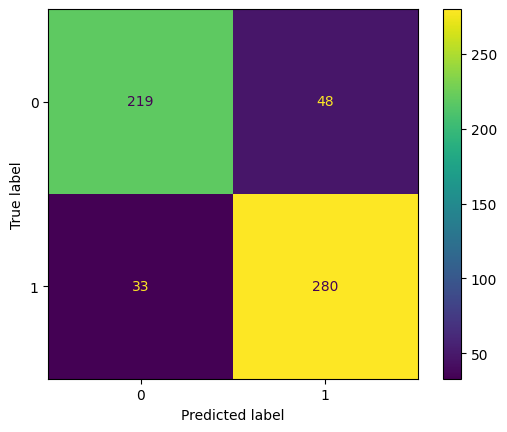

In [42]:
cf = confusion_matrix(y_test, y_pred)
plotcf = ConfusionMatrixDisplay(cf)
plotcf.plot()

In [43]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       267
           1       0.85      0.89      0.87       313

    accuracy                           0.86       580
   macro avg       0.86      0.86      0.86       580
weighted avg       0.86      0.86      0.86       580

